### Tasks:

You will be graded on the dashboards displaying the specified data and the screenshots you took during the final project lab questions. There are 12 possible points for this assignment. Here is the breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

In [16]:
!pip install yfinance==0.2.4

!pip install requests==2.26.0
print('installed')

  Using cached lxml-4.9.2-cp310-cp310-win_amd64.whl (3.8 MB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4
installed


In [2]:
import yfinance as yf
import pandas as pd

#### 1 - Extracting Tesla Stock Data Using yfinance

In [255]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#### 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [275]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [276]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests 

In [277]:
dataframe_list = pd.read_html(url, flavor='bs4')
len(dataframe_list)

6

In [278]:
dataframe_list[5]

,Link Preview,HTML Code (Click to Copy)
0,Tesla Revenue 2010-2023 | TSLA,NaN
1,Macrotrends,NaN
2,Source,NaN


In [285]:
tesla_revenue=pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue= tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)':'Date', 
                                             'Tesla Quarterly Revenue (Millions of US $).1':'Revenue'})
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '')
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue.tail()

C:\Users\Master\AppData\Local\Temp\ipykernel_17264\1415877062.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Date,Revenue
51,2010-06-30,28
52,2010-03-31,21
53,2009-12-31,NaN
54,2009-09-30,46
55,2009-06-30,27


In [288]:
tesla_revenue =tesla_revenue.fillna(0)
tesla_revenue ['Revenue'] = tesla_revenue ['Revenue'].astype('int')

#### 3 - Extracting GameStop Stock Data Using yfinance

In [261]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max").reset_index()
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### 4 - Extracting GameStop Revenue Data Using Webscraping

In [262]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [263]:
dataframe_list = pd.read_html(url, flavor='bs4')
len(dataframe_list)

6

In [264]:
gme_revenue =pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue= gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)':'Date', 
                                             'GameStop Quarterly Revenue (Millions of US $).1':'Revenue'})
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '')
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '')
gme_revenue['Date'] = pd.to_datetime(
    gme_revenue['Date'])
gme_revenue.dtypes

C:\Users\Master\AppData\Local\Temp\ipykernel_17264\2467382787.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Date       datetime64[ns]
Revenue            object
dtype: object

In [265]:
gme_revenue =gme_revenue.fillna(0)
gme_revenue ['Revenue'] = gme_revenue ['Revenue'].astype('int')

In [266]:
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


In [267]:
gme_revenue.dtypes

Date       datetime64[ns]
Revenue             int32
dtype: object

#### 5 - Tesla Stock and Revenue Dashboard

In [268]:
import matplotlib.pyplot as plt

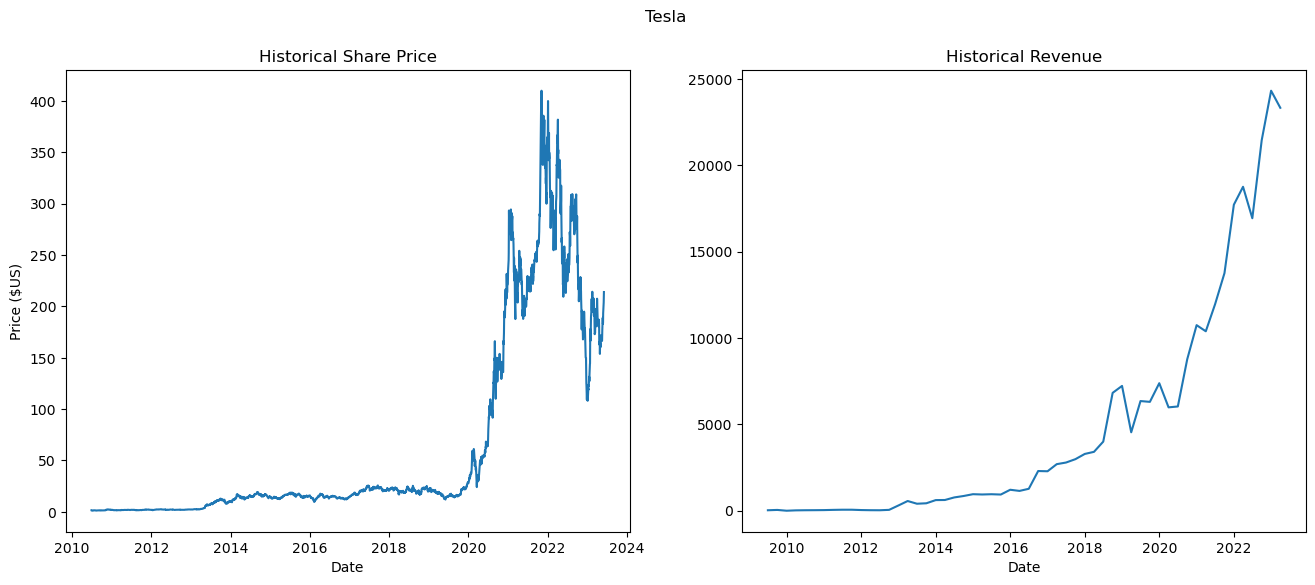

In [289]:
# Creating 4 subplots for dashboard
fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(tesla_data['Date'],tesla_data['Close'])
ax1.set_title('Historical Share Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($US)')
#ax2.plot(tesla_data['Date'],tesla_data['Volume'])
#ax2.set_title('Tesla Volume')
#ax3.plot(tesla_data['Date'],tesla_data['Dividends'])
#ax3.set_title('Tesla Dividends')
ax4.plot(tesla_revenue['Date'], 
         tesla_revenue['Revenue'])
ax4.set_title('Historical Revenue')
ax4.set_xlabel('Date')
ax1.set_xlabel('Date')
fig.suptitle('Tesla')
plt.show()

In [199]:
# as a format example
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2023--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2023-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [290]:
# error demonstrating
!pip install nbformat==4.2.0
make_graph(tesla_data, tesla_revenue, 'Tesla')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

#### 6 - GameStop Stock and Revenue Dashboard

In [138]:
df_gme['GameStop Quarterly Revenue (Millions of US $).1'].head()

0    $2,226
1    $1,186
2    $1,136
3    $1,378
4    $2,254
Name: GameStop Quarterly Revenue (Millions of US $).1, dtype: object

In [203]:
gme_revenue ['GameStop Quarterly Revenue (Millions of US $)'] = pd.to_datetime(
    gme_revenue ['GameStop Quarterly Revenue (Millions of US $)'])
gme_revenue.tail()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
52,2010-01-31,"$3,524"
53,2009-10-31,"$1,835"
54,2009-07-31,"$1,739"
55,2009-04-30,"$1,981"
56,2009-01-31,"$3,492"


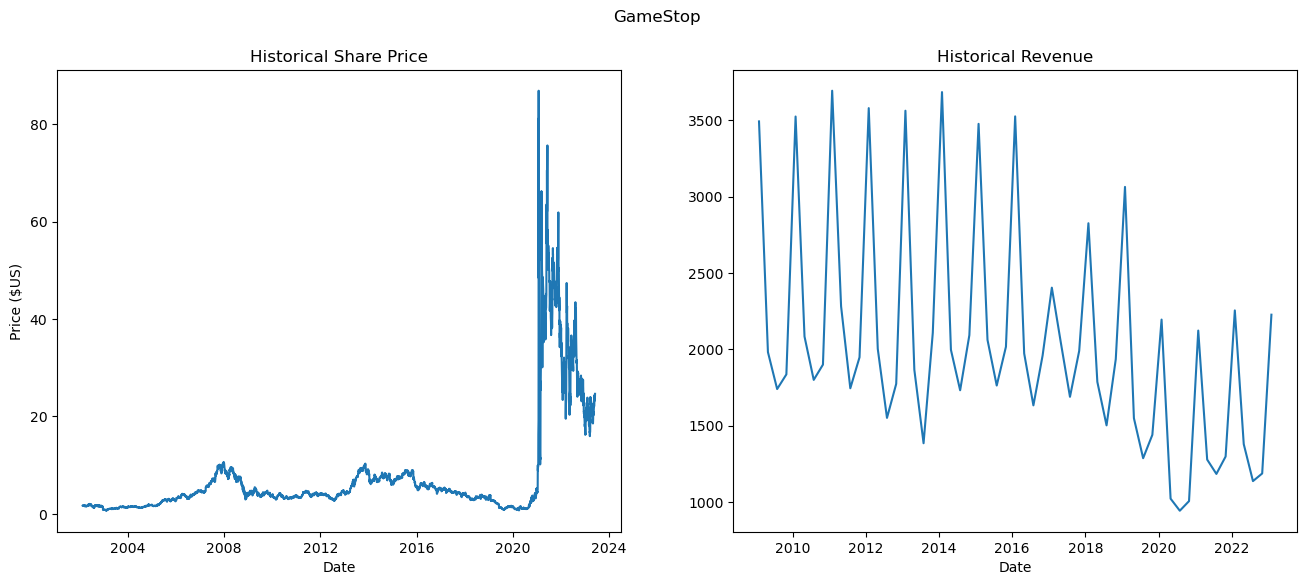

In [252]:
# Creating 4 subplots for dashboard
fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(gme_data['Date'],gme_data['Close'])
ax1.set_title('Historical Share Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($US)')
#ax2.plot(tesla_data['Date'],tesla_data['Volume'])
#ax2.set_title('Tesla Volume')
#ax3.plot(tesla_data['Date'],tesla_data['Dividends'])
#ax3.set_title('Tesla Dividends')
ax4.plot(gme_revenue['Date'], 
         gme_revenue['Revenue'])
ax4.set_title('Historical Revenue')
ax4.set_xlabel('Date')
ax1.set_xlabel('Date')
fig.suptitle('GameStop')
plt.show()